In [48]:
import pandas as pd
import numpy as np

import plotnine as gg
from plotnine import ggplot, aes

In [49]:
pal = {
    "Fundo Azul": "#081133",
    "Logo Rosa": "#f751a5",
    "Logo Roxo": "#914ecd",
    "Logo Azul": "#264fe8",
    "Verde": "#05a31a",
    "Fundo Branco": "#f1f1f1",
    "Preto": "#0d0d0d",
    "Grid": "#DADBDE"
}

theme_gvcode = (
    gg.theme_minimal()
    + gg.theme(
        panel_grid_major = gg.element_line(color = pal["Grid"]),    
        panel_grid_minor = gg.element_line(color = pal["Grid"]),   
        axis_ticks       = gg.element_line(color = pal["Grid"]),          

        panel_border = gg.element_rect(color = pal["Fundo Azul"], fill = None),
        panel_grid = gg.element_line(color = pal["Fundo Azul"]),
        panel_background = gg.element_rect(fill = None),

        legend_background = gg.element_rect(color = pal["Fundo Branco"]),
        legend_text = gg.element_text(),
        legend_title = gg.element_text(),

        plot_background = gg.element_rect(fill = pal["Fundo Branco"]),

        plot_title = gg.element_text(
            family = "Montserrat",
            size = 16,
            face = 'bold',
            hjust = 0,
            vjust = 1,
            margin = {'b': 4}
        ),

        plot_subtitle = gg.element_text(
            family = "Montserrat",
            size = 14,
            hjust = 0
        ),

        plot_caption = gg.element_text(
            family = "Montserrat",
            size = 9,
            hjust = 1
        ),

        axis_title = gg.element_text(
            family = "Nunito Sans",
            size = 10,
            lineheight = 18
        ),

        axis_text = gg.element_text(
            family = "Nunito Sans",
            size = 9
        ),
    )
)

In [50]:
sheet = 'Aula 1'
path = '../solutions/Trainee 2024.2 - Notas.xlsx'

df = pd.read_excel(path, sheet_name = sheet)\
    .filter(like='Ex. ')

df = df.drop(df.index[-1])

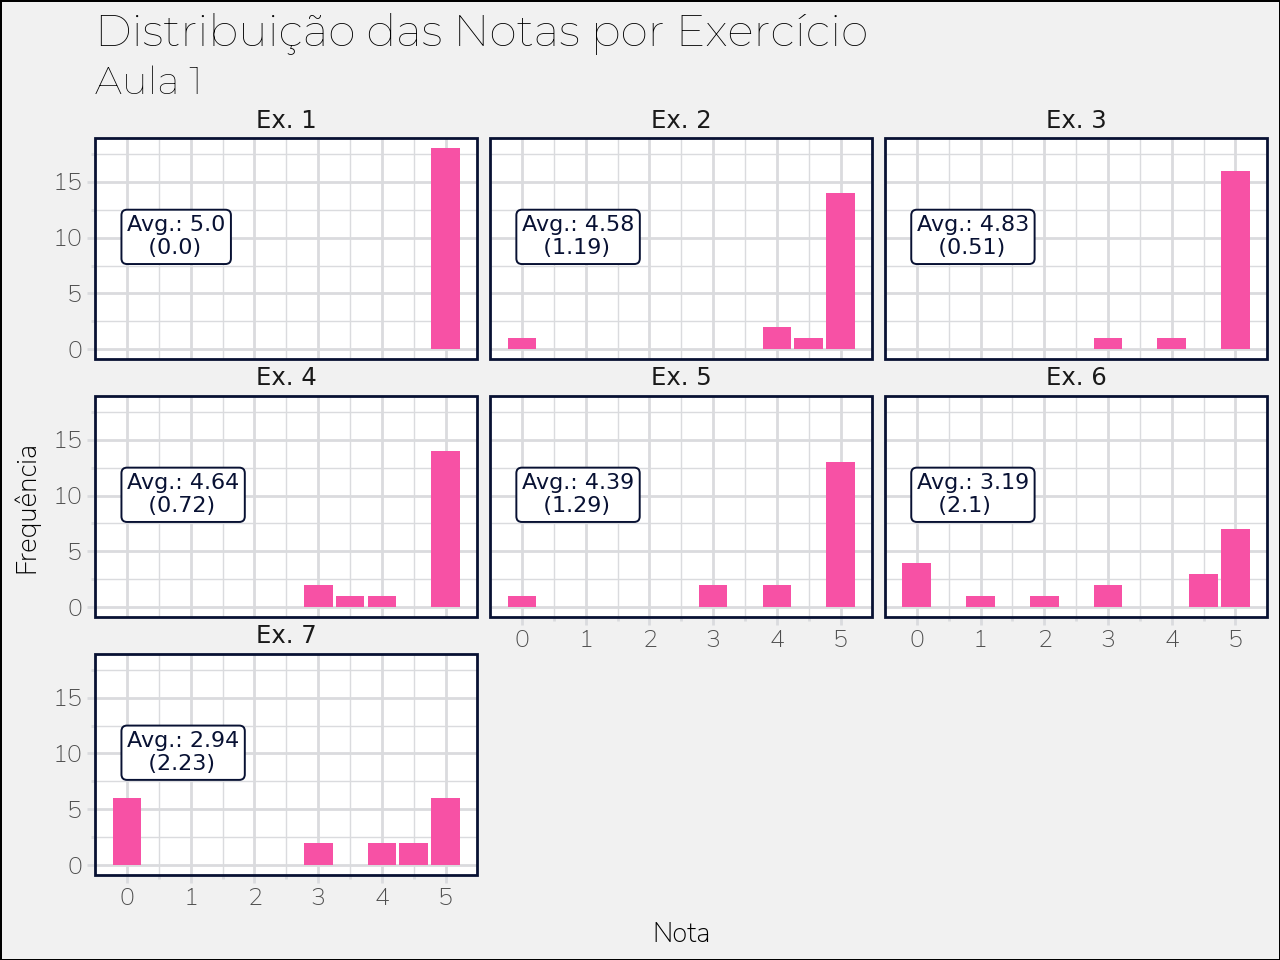

In [72]:
stats = zip(*map(lambda x: x().round(2).to_numpy(), (df.mean, df.std)))

gdf_labels = pd.DataFrame({
    'Exercise': df.columns,
    'Stat': [f'Avg.: {m}\n   ({s})' for m, s in stats]
})

gdf = df.melt(var_name = 'Exercise', value_name = 'Nota')

(
    ggplot(gdf) +
    gg.stat_count(aes(x = 'Nota'), fill = pal['Logo Rosa']) +
    gg.geom_label(aes(0, 12, label = 'Stat'), gdf_labels,
        color = pal['Fundo Azul'], ha = 'left', va = 'top', size = 8
    ) +
    gg.facet_wrap('Exercise') +
    gg.scale_x_continuous(breaks = np.arange(0, 6, 1)) +
    gg.labs(
        title = 'Distribuição das Notas por Exercício',
        subtitle = sheet,
        y = 'Frequência'
    ) +
    theme_gvcode
)

In [51]:
# Unused:

table = df.agg(['mean', 'std']).round(2)

table.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', '#333'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', '#fff'), ('color', '#000')]},
    {'selector': 'tbody tr:nth-child(even) td', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tbody tr:hover td', 'props': [('background-color', '#e0e0e0')]}
])\
    .set_caption('Aggregated Statistics')\
    .format(precision=2, na_rep='')\
    .to_html('table.html')